PRE PROCESSING

(3662, 5494, 3)


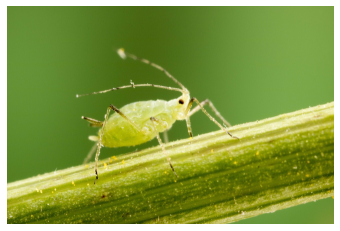

In [31]:
image_path = 'farm_insects\Aphids\Image_1.jpeg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Read the image
img = mpimg.imread(image_path)


print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [5]:
# import cv2

# # Load the image
# image_path = 'farm_insects\Aphids\Image_1.jpeg'
# image = cv2.imread(image_path)

# # Convert to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Save the grayscale image
# cv2.imwrite('GrayScale\Aphids\Image_1.jpeg', gray_image)

True

(3662, 5494)


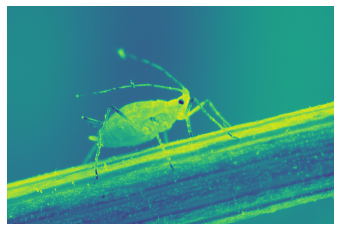

In [32]:
image_path = 'GrayScale\Aphids\Image_1.jpeg'
# Read the image
img = mpimg.imread(image_path)
print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [10]:
import os
from PIL import Image

# Define the root directory containing the subcategories
root_dir = 'farm_insects'

# List of subcategories
subcategories = ['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms']

# Create the 'GrayScale' directory if it doesn't exist
output_root_dir = 'GrayScale'
os.makedirs(output_root_dir, exist_ok=True)

# Loop through each subcategory
for subcategory in subcategories:
    subcategory_path = os.path.join(root_dir, subcategory)

    # Create a subdirectory within 'GrayScale' for the current subcategory
    output_subcategory_dir = os.path.join(output_root_dir, subcategory)
    os.makedirs(output_subcategory_dir, exist_ok=True)

    # Loop through each image in the subcategory
    for filename in os.listdir(subcategory_path):
        image_path = os.path.join(subcategory_path, filename)

        # Load the image
        image = Image.open(image_path)

        # Convert to grayscale
        gray_image = image.convert('L')

        # Save the grayscale image to the respective subcategory folder
        output_path = os.path.join(output_subcategory_dir, filename)
        gray_image.save(output_path)

print("Grayscale conversion completed. Grayscale images saved in the 'GrayScale' directory.")


Grayscale conversion completed. Grayscale images saved in the 'GrayScale' directory.


In [16]:
from PIL import Image
import os

# Define the path to the image
image_path = 'farm_insects\Aphids\Image_1.jpeg'

# Open the image
image = Image.open(image_path)

# Define the target size (adjust as needed)
target_size = (256, 256)

# Resize the image
resized_image = image.resize(target_size)

# Save the resized image to a new file
output_path = 'Resized\Aphids\Image_1.jpeg'
resized_image.save(output_path)

print(f"Image resized and saved to: {output_path}")


Image resized and saved to: Resized\Aphids\Image_1.jpeg


In [17]:
from PIL import Image
import os

# Define the root directory containing the subcategories
root_dir = 'farm_insects'

# List of subcategories
subcategories = ['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms']

# Create the 'Resized' directory if it doesn't exist
output_root_dir = 'Resized'
os.makedirs(output_root_dir, exist_ok=True)

# Loop through each subcategory
for subcategory in subcategories:
    subcategory_path = os.path.join(root_dir, subcategory)

    # Create a subdirectory within 'Resized' for the current subcategory
    output_subcategory_dir = os.path.join(output_root_dir, subcategory)
    os.makedirs(output_subcategory_dir, exist_ok=True)

    # Loop through each image in the subcategory
    for filename in os.listdir(subcategory_path):
        image_path = os.path.join(subcategory_path, filename)

        # Load the image
        image = Image.open(image_path)

        # Define the target size (adjust as needed)
        target_size = (256, 256)

        # Resize the image
        resized_image = image.resize(target_size)

        # Save the resized image to the respective subcategory folder
        output_path = os.path.join(output_subcategory_dir, filename)
        resized_image.save(output_path)

print("Resizing completed. Resized images saved in the 'Resized' directory.")


Resizing completed. Resized images saved in the 'Resized' directory.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Define the path to the directory containing your images
input_dir = 'Resized'

# Define the path to the directory where augmented images will be saved
output_dir = 'BackgroundRemoved'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the input directory
image_files = [os.path.join(input_dir, filename) for filename in os.listdir(input_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]

# Perform augmentation for each image
for image_file in image_files:
    img = Image.open(image_file)
    img_array = img.convert('RGB')

    # Reshape the image to (1, height, width, channels) for the generator
    img_array = img_array.resize((256, 256))  # adjust the size as needed
    img_array = img_array.reshape((1,) + img_array.shape)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= 5:  # You can adjust the number of augmented images per original image
            break


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

# Set your base directory containing the subdirectories with images
base_directory = 'Resized'

# Specify the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Specify the directory to save the augmented images
output_directory = 'Augmented1'

# Specify the number of subdirectories to augment
num_subdirectories_to_augment = 3

# Counter to keep track of the number of processed subdirectories
subdirectory_count = 0

# Loop through each subdirectory in the base directory
for subdirectory in os.listdir(base_directory):
    subdirectory_path = os.path.join(base_directory, subdirectory)

    # Check if the item is a directory
    if os.path.isdir(subdirectory_path):
        print(f"Augmenting images in {subdirectory}...")

        # Create a new directory in the output directory for the augmented images
        output_subdirectory = os.path.join(output_directory, subdirectory + '_augmented')
        os.makedirs(output_subdirectory, exist_ok=True)

        # Generate augmented images and save them to the new directory
        for filename in os.listdir(subdirectory_path):
            img_path = os.path.join(subdirectory_path, filename)

            # Check if the item is a file (image)
            if os.path.isfile(img_path):
                img = image.load_img(img_path, target_size=(256, 256))
                x = image.img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Generate augmented images and save them to the new directory
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_subdirectory, save_prefix='aug', save_format='jpeg'):
                    i += 1
                    if i >= 2:  # Generate 5 augmented images per original image
                        break

        subdirectory_count += 1

        # Check if the required number of subdirectories have been augmented
        if subdirectory_count >= num_subdirectories_to_augment:
            break

print(f"Data augmentation completed for the first {num_subdirectories_to_augment} subdirectories. Augmented images saved to separate directories.")

Augmenting images in Africanized Honey Bees (Killer Bees)...
Augmenting images in Aphids...
Augmenting images in Armyworms...
Data augmentation completed for the first 3 subdirectories. Augmented images saved to separate directories.


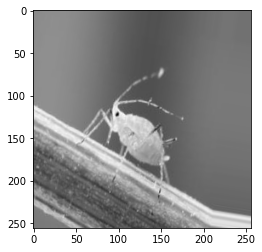

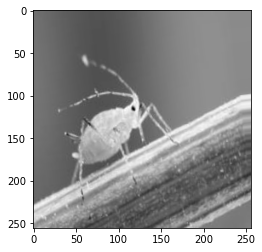

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image you want to augment
image_path = 'Resized\Aphids\Image_1.jpeg'

# Specify the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the image
img = image.load_img(image_path, target_size=(256, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Create a directory to save augmented images (optional)
output_directory = 'Augmented'
os.makedirs(output_directory, exist_ok=True)

# Generate augmented images and display/save them
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix='aug', save_format='jpeg'):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i >= 2:  # Generate 2 augmented images
        break

plt.show()

MODEL CREATION

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Input shape (height, width, channels) for images
num_classes = 3  # Number of classes for classification

# Create ResNet model
def create_resnet_model(input_shape, num_classes):
    # Load pre-trained ResNet50 model without the top (classification) layers
    resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the pre-trained layers to prevent training
    for layer in resnet_model.layers:
        layer.trainable = False

    # Add custom classification layers on top of the pre-trained ResNet50
    x = layers.Flatten()(resnet_model.output)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = models.Model(inputs=resnet_model.input, outputs=output)

    return model

# Create an instance of the ResNet model
resnet_model = create_resnet_model(input_shape, num_classes)

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
                     metrics=['accuracy'])

# Print model summary
resnet_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [5]:
# Assuming you have already trained the model and stored it in the variable 'resnet_model'

# Load the test dataset and preprocess it
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

test_generator = test_datagen.flow_from_directory(
    'Augmented1',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle=False to keep the order of predictions consistent with ground truth labels
)

# Evaluate the model on the test dataset
loss, accuracy = resnet_model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Found 557 images belonging to 3 classes.
18/18 [==============================] - 42s 2s/step - loss: 1.6284 - accuracy: 0.2873
Test Loss: 1.628402590751648
Test Accuracy: 0.28725314140319824


In [12]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and stored it in the variable 'resnet_model'

# Load the test dataset and preprocess it
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

test_generator = test_datagen.flow_from_directory(
    'Resized',
    target_size=(256, 256),
    batch_size=70,
    class_mode='categorical',
    shuffle=False  # Set shuffle=False to keep the order of predictions consistent with ground truth labels
)

# Make predictions on the test dataset
y_pred = resnet_model.predict(test_generator)
y_true = test_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred.argmax(axis=1), target_names=test_generator.class_indices.keys())

# Print the classification report
print(report)


Found 278 images belonging to 3 classes.
                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.00      0.00      0.00        96
                              Aphids       0.26      0.31      0.28        87
                           Armyworms       0.35      0.63      0.45        95

                            accuracy                           0.31       278
                           macro avg       0.20      0.31      0.24       278
                        weighted avg       0.20      0.31      0.24       278



c:\Users\YASH\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\YASH\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\YASH\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif